In [1]:
import pytimber
from pyspark.sql import SparkSession
import os
import sys
from lhcsmapi.metadata import signal_metadata
from lhcsmapi.api import query, resolver, processing
from nxcals.api.extraction.data.builders import DataQuery, DevicePropertyDataQuery
from lhcsmapi.pyedsl.dbsignal.post_mortem.PmDbRequest import PmDbRequest
from nxcals.spark_session_builder import get_or_create, Flavor 
from nxcals.api.extraction.data.builders import *

db = pytimber.LoggingDB()

if "SPARK_HOME" not in os.environ:
    os.environ["SPARK_HOME"] = os.path.join(sys.prefix, "nxcals-bundle")
    
spark =get_or_create(app_name='MY_APP', flavor=Flavor.LOCAL,conf={'spark.executor.instances': '4',"spark.executor.cores":"4","spark.executor.memory":"4g"})

Trying to determine YARN usage to make Python work correctly (conf/spark-env.sh)...
Not using YARN
Using virtual venv 
PYSPARK_PYTHON == /afs/cern.ch/user/v/volodymy/miniconda3/bin/python
PYSPARK_DRIVER_PYTHON == /afs/cern.ch/user/v/volodymy/miniconda3/bin/python
PYSPARK_DRIVER_PYTHON_OPTS == 


23/03/22 11:17:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/22 11:18:20 ERROR Inbox: Ignoring error
java.lang.NullPointerException
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$register(BlockManagerMasterEndpoint.scala:579)
	at org.apache.spark.storage.BlockManagerMasterEndpoint$$anonfun$receiveAndReply$1.applyOrElse(BlockManagerMasterEndpoint.scala:121)
	at org.apache.spark.rpc.netty.Inbox.$anonfun$process$1(Inbox.scala:103)
	at org.apache.spark.rpc.netty.Inbox.safelyCall(Inbox.scala:213)
	at org.apache.spark.rpc.netty.Inbox.process(Inbox.scala:100)
	at org.apache.spark.rpc.netty.MessageLoop.org$apache$spark$rpc$netty$MessageLoop$$receiveLoop(MessageLoop.scala:75)
	at org.apache.spark.rpc.netty.MessageLoop$$anon$1.run(MessageLoop.scala:41)
	at java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:511)
	at java.util.concurr

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import matplotlib.cbook as cbook
import matplotlib.ticker as mtick

from bokeh.plotting import figure, output_file, output_notebook, show, save, ColumnDataSource
from bokeh.models import Legend, LinearAxis, Range1d, CustomJS, Slider, Span, Tabs
from bokeh.models.glyphs import Rect
from bokeh.layouts import row, column, gridplot,layout
import bokeh.palettes
output_notebook()

Loading BokehJS ...

In [3]:
BLMs_frame=pd.read_csv("/afs/cern.ch/work/v/volodymy/public/NXCAlS_data/BLM_IP7.csv")
BLMs_frame.keys().values
BLMs_frame=BLMs_frame.sort_values(by=['Dcum Mid S'],ignore_index=True)
BLMs_frame['Expert Name']+="%LOSS_RS12"

In [5]:
BLMs_list=BLMs_frame['Expert Name'].tolist()
BLM_S_list=BLMs_frame['Dcum Mid S'].tolist()

In [6]:
BLMs_IP7,BLM_S_IP7=[],[]
for blm in range(len(BLMs_list)):
    var=db.search(BLMs_list[blm])
    if not var:
        continue
    BLMs_IP7.append(var[0])
    BLM_S_IP7.append(BLM_S_list[blm]) 

In [7]:
intensityB2D = 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY_ADC24BIT'
intensityB2F = 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY'

BegV10='2022-11-23 02:41:00'
EndV10='2022-11-23 02:42:00'

### Ion study for 2023

# Beg0='2018-11-13 23:45:49'
# End0='2018-11-13 23:45:49'

#To apply time zone shifts: 2022-11-23T02:42:00+01:00

In [14]:
### Ion study for 2018 to 2023
intensityB1F='LHC.BCTFR.A6R4.B1:BEAM_INTENSITY'
intensityB1D = 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY'

#Event 1
Beg1='2018-11-13 22:45:39'
End1='2018-11-13 22:45:59'
#Event 2
Beg2='2018-11-16 04:56:48'
End2='2018-11-16 04:56:58'
#Event 3
Beg3='2018-11-17 13:53:59'
End3='2018-11-17 13:54:19'
#Event 4
Beg4='2018-11-20 20:34:51'
End4='2018-11-20 20:35:11'
#Event 5
Beg5='2018-11-20 23:17:48'
End5='2018-11-20 23:18:08'
#Event 6
Beg6='2018-11-28 22:38:25'
End6='2018-11-28 22:38:45'



In [90]:
# Experimental V1
from lhcsmapi.Time import Time
from datetime import datetime

pm_system = 'BCT'
pm_class = 'BCTFRLHC'
pm_source = 'LHC.BCTFR.A6R4.B1'
t_start = Time.to_unix_timestamp('2018-11-16 04:56:58+0000', unit="ns", tz='Europe/Zurich')
duration = 10000000000 #ns

pm_data_request = PmDbRequest.generate_request("pmdata", False, source=pm_source, system=pm_system, className=pm_class, fromTimestampInNanos=t_start, durationInNanos=duration)

events = query.query_pm_events('BCT', 'BCTFRLHC', 'LHC.BCTFR.A6R4.B1', t_start, duration) 
timestamp=events.timestamp.to_list()
raw = query.query_raw_pm_data(pm_system, pm_class, pm_source, timestamp[0])
test = pd.DataFrame({'pmIntensityHistory': raw['pmIntensityHistory']}, index=raw['pmIntensityHistoryTS'])
test

Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.


pmIntensityHistory
1542344190799708928        9.899079e+12
1542344190819628032        9.898324e+12
1542344190839546880        9.897070e+12
1542344190859465984        9.898224e+12
1542344190879385088        9.897719e+12
...                                 ...
1542344220578726912        0.000000e+00
1542344220598646016        0.000000e+00
1542344220618564864        0.000000e+00
1542344220638483968        0.000000e+00
1542344220658403072        0.000000e+00

[1500 rows x 1 columns]

<AxesSubplot: >

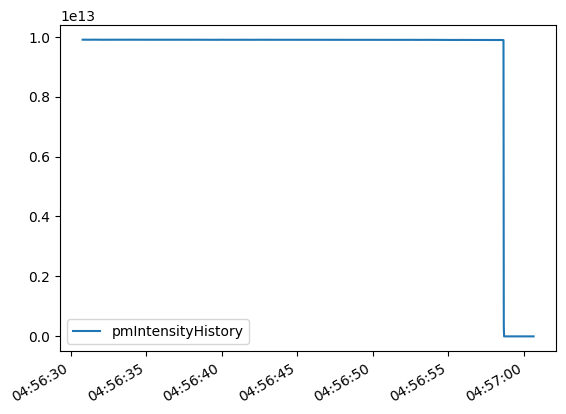

In [93]:
# Experimental V2
import requests
import json

response = requests.get(pm_data_request)

json_response = json.loads(response.text)

name = json_response['content'][0]['namesAndValues'][8]['name']
time = json_response['content'][0]['namesAndValues'][7]['value']
value = json_response['content'][0]['namesAndValues'][8]['value']

pd.DataFrame(value, pd.to_datetime(time,unit="ns"), [name]).plot()


In [94]:
# NXCALS
intensity_V1_SQL=DataQuery.getForVariables(spark, system='CMW', start_time=BegV10,end_time=EndV10,variables=[intensityB2F])

23/03/22 12:11:49 WARN URLConfigurationSource: No URLs will be polled as dynamic configuration sources.
DataFrame constructor is internal. Do not directly use it.                      


In [95]:
# intensity_nom=intensity_nom_SQL.toPandas()
intensity_V1=intensity_V1_SQL.toPandas()

In [96]:
# intensity_nom=intensity_nom.sort_values(by=['nxcals_timestamp'],ignore_index=True)
# intensity_nom['nxcals_timestamp']=pd.to_datetime(intensity_nom['nxcals_timestamp'],unit='ns')
intensity_V1=intensity_V1.sort_values(by=['nxcals_timestamp'],ignore_index=True)
intensity_V1['nxcals_timestamp']=pd.to_datetime(intensity_V1['nxcals_timestamp'],unit='ns')

In [97]:
# intensity_nom.pop('nxcals_entity_id')
intensity_V1.pop('nxcals_entity_id')

0     46424
1     46424
2     46424
3     46424
4     46424
5     46424
6     46424
7     46424
8     46424
9     46424
10    46424
11    46424
12    46424
13    46424
14    46424
15    46424
16    46424
17    46424
18    46424
19    46424
20    46424
21    46424
22    46424
23    46424
24    46424
25    46424
26    46424
27    46424
28    46424
29    46424
30    46424
31    46424
32    46424
33    46424
34    46424
35    46424
36    46424
37    46424
38    46424
39    46424
40    46424
41    46424
42    46424
43    46424
44    46424
45    46424
46    46424
47    46424
48    46424
49    46424
50    46424
51    46424
52    46424
53    46424
54    46424
55    46424
56    46424
57    46424
58    46424
59    46424
Name: nxcals_entity_id, dtype: int64

In [98]:
intensity_group=intensity_V1.groupby(["nxcals_variable_name"])
# x0= datetime.strptime(Beg2, '%Y-%m-%d %H:%M:%S')
x0= pd.Timestamp(datetime.strptime(BegV10, '%Y-%m-%d %H:%M:%S'))
# x1= datetime.strptime(End2, '%Y-%m-%d %H:%M:%S')
x1= pd.Timestamp(datetime.strptime(EndV10, '%Y-%m-%d %H:%M:%S'))

In [142]:
%matplotlib qt
fig = plt.figure(2,figsize=(10,6))
host = fig.add_subplot(311)
host.set_ylabel('[$protons$]')
host.plot(intensity_group.get_group(intensityB2F)["nxcals_value"])
# host.plot(intensity_group.get_group(intensityB2F)["nxcals_timestamp"],intensity_group.get_group(intensityB2F)["nxcals_value"])
# plt.xlim(x0,x1)

In [101]:
# power_nom=-np.diff(intensity_group.get_group(intensityB2F)["nxcals_value"])*1.602E-10*6.8
# power_nom=np.insert(power_nom,0,0)
power_V1=-np.diff(intensity_group.get_group(intensityB2F)["nxcals_value"])*1.602E-10*6.8
power_V1=np.insert(power_V1,0,0)

In [143]:
host = fig.add_subplot(312)
host.set_ylabel('[$Power~[kW/s]$]')
host.plot(power_V1)

In [62]:
# mean_loss_V1=(intensity_V1["nxcals_value"][9]-intensity_V1["nxcals_value"][11])/2
mean_loss_V1=intensity_group.get_group(intensityB2F)["nxcals_value"][10]-intensity_group.get_group(intensityB2F)["nxcals_value"][58]
mean_loss_V1

9942103732946.156

In [107]:
# BLM part
BLMS=DataQuery.getForVariables(spark, system='CMW', start_time=BegV10,end_time=EndV10,variables=BLMs_IP7).toPandas()

DataFrame constructor is internal. Do not directly use it.


In [108]:
BLMS.pop('nxcals_entity_id')
BLMS=BLMS.sort_values(by=['nxcals_timestamp'],ignore_index=True)
BLMS['nxcals_timestamp']=pd.to_datetime(BLMS['nxcals_timestamp'],unit='ns')

In [109]:
df_BLM = BLMS.pivot(columns='nxcals_variable_name', index='nxcals_timestamp', values='nxcals_value')

In [144]:
host = fig.add_subplot(313)
host.set_xlabel("Time")
host.set_ylabel('BLM [$Gy s^{-1}$]')
host.plot(df_BLM)
S_blm_idx=[BLMs_IP7.index(ele) for ele in df_BLM.columns[:]]
S_blms=[BLM_S_IP7[idx] for idx in S_blm_idx]
Noise_blm=[df_BLM[ele][0] for ele in df_BLM.columns[:]]
Signal_blm=[df_BLM[ele][59] for ele in df_BLM.columns[:]]


In [149]:
data = pd.DataFrame({'S_m': S_blms,'Noise_Gys':Noise_blm,'Signal_Gys':Signal_blm,'Name':list(df_BLM.columns[:])})
data=data.sort_values(by=['S_m'],ignore_index=True) 

In [157]:
%matplotlib qt
fig = plt.figure(500,figsize=(10,5))
host = fig.add_subplot(111)
host.set_xlabel("Distance [m]")
host.set_ylabel('[Gy/primary]')
host.set_yscale('log')
plt.title('Signals from BLMs in IP7 for ions in 2018')
host.plot(data['S_m'],data['Signal_Gys'],color='red', marker='.',mfc='red',label='Measurements', linewidth=1)